# Marine Heat Waves and xarray
## Calculate MHWs on a time series (from a point or an averaged region)

In [30]:
# MHW Test Run
import numpy as np
import pandas as pd
import xarray as xr
from datetime import date
import datetime as dt
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [90]:
# load our functions.
# for now, use oliver's 
# our defined below
import marineHeatWaves as mhw

In [91]:
# get data in xarray format: load file or get data
sda = xr.open_dataset('./sst_example.nc')
sst2 = sda.analysed_sst # sst has a time component already

In [92]:
# if one point: call event detect function directly
# if a region: average into a single time series and call event detect function

In [93]:
# call detect function - nick function
# for now return: time_start (datetime), duration, intensity for each event (per time series)

# get time in correct format - to be integrated into detect
t2 = sst.time.values
t1 = pd.DatetimeIndex(t2)
t = np.arange(date(t1[0].year,t1[0].month,t1[0].day).toordinal(),date(t1[-1].year,t1[-1].month,t1[-1].day).toordinal()+1)
sst = sst2.values

mhws, clim = mhw.detect(t, sst, climatologyPeriod=[2003,2019])

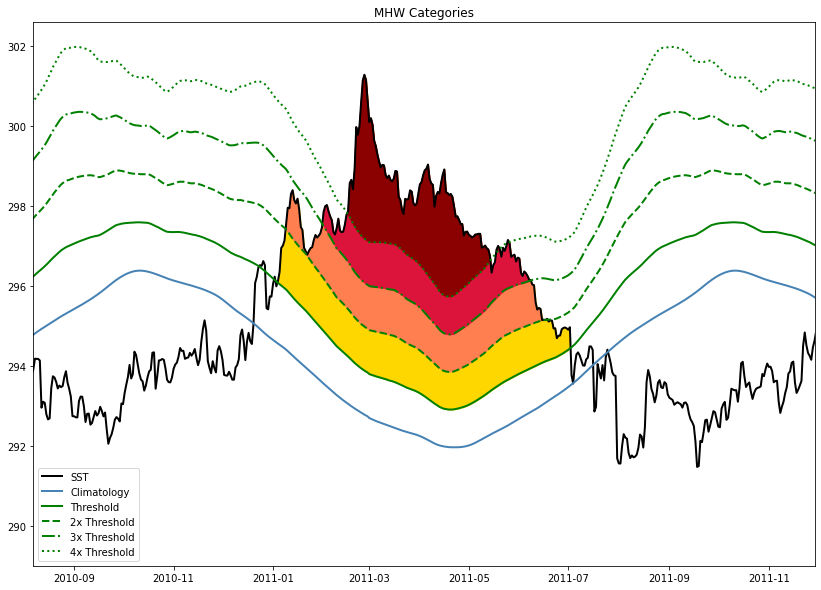

In [101]:
# plot max ev
ev = np.argmax(mhws['intensity_max']) # Find largest event

event_line_cat(ev,sst, t, mhws,clim)

In [100]:
def event_line_cat(ev, sst, t, mhws, clim):
    
    '''
    Function for plot categories MHW
    Bruna Alves, 2020
    Ocean Hack Week MHW project
    '''

    '''
    inputs:
    'ev'    event number, you must select event from mhws (obtained from mhw.detect)
    'sst'   sea surface temperature variable (1D)
    'mhws'  output from mhw.detect
    'clim'  output from mhw.detect 
    '''
    
    from matplotlib import colors as mcolors
    colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    
    dates = [date.fromordinal(tt.astype(int)) for tt in t]
    diff = clim['thresh']-clim['seas']     
    threshold2x = clim['thresh']+diff
    threshold3x = threshold2x+diff
    threshold4x = threshold3x+diff
    
    if ev>2:
        evi=ev-2
    else:
        evi=0
        
    plt.figure(figsize=(14,10))        
    for ev0 in np.arange(evi, ev+2, 1):
        t1 = np.where(t==mhws['time_start'][ev0])[0][0]
        t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    
        #Plot fill
        #Moderate
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], color=colors['gold'])
    
        #Strong
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold2x[t1:t2+1],
                  where = (sst[t1:t2+1] > clim['thresh'][t1:t2+1]) & (sst [t1:t2+1] > threshold2x[t1:t2+1]), 
                  color=colors['coral'])
    
        #Severe
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold3x[t1:t2+1], 
                  where = (sst[t1:t2+1] > threshold2x[t1:t2+1]) & (sst [t1:t2+1] > threshold3x[t1:t2+1]), 
                  color=colors['crimson'])
    
        #Extreme
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold4x[t1:t2+1], 
                     where = (sst[t1:t2+1] > threshold3x[t1:t2+1]) & (sst [t1:t2+1] > threshold4x[t1:t2+1]), 
                     color=colors['darkred'])

    
        # Plot SST, Thresh, 2x, 3x, 4x
    plt.plot(dates, sst, 'k-', linewidth=2,label='SST')
    plt.plot(dates, clim['seas'], '-', linewidth=2, color=colors['steelblue'],label = 'Climatology')
    plt.plot(dates, clim['thresh'], 'g-', linewidth=2, label = 'Threshold')
    plt.plot(dates,threshold2x, 'g--',linewidth=2,label = '2x Threshold')
    plt.plot(dates,threshold3x, 'g-.',linewidth=2, label = '3x Threshold')
    plt.plot(dates,threshold4x, 'g:',linewidth=2, label = '4x Threshold')
    plt.title('MHW Categories')       
    plt.xlim(datetime.date.fromordinal(mhws['time_start'][ev]-150), datetime.date.fromordinal(mhws['time_end'][ev]+150))
    plt.legend()